# Optimization for machine/deep learning: homework 4

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

Included with the notebook are 

- datasets `breast_cancer_data.csv`  and `student_debt.csv` 


be sure you have these files located in the same directory where you put this notebook!

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.

In [1]:
########## useful imports ###########
# the next three lines allow you to easily make plots in notebook, and use a nice renderer (for prettier pictures)
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# import some standard libraries
import autograd.numpy as np   
import matplotlib.pyplot as plt
import copy   

# Getting to know autograd

If you have not yet, make sure to pip-install the automatic differentiator [autograd](https://github.com/HIPS/autograd) - you can install this package via your terminal by typing 

``pip install autograd``

This is a professionally developed automatic differentiator we will use here for Newton's method, as well as for other algorithms in the course.

## Testing autograd

Time to add in a powerful gradient calculator that works well with the numpy library.  [Click here to view the github repo](https://github.com/HIPS/autograd) - download its contents to your machine. 

When using autograd for automatic differentiation, be sure to employ autograd's version of numpy - so that the automatic differentiator can correctly parse your input functions.

In [2]:
# import statement for autograd wrapped numpy
import autograd.numpy as np   

There are two standard ways of defining functions in Python.  First the the standard named Python function like below

In [3]:
# a named Python function
def sin(w):
    return np.sin(w)

WIth this declaration Python now understands 'sin' as its own function, so it can be called as follows.

In [4]:
# how to use the 'sin' function
w_val = 1.0   # a test input for our 'sin' function
g_val = sin(w_val)
print (g_val)

0.841470984808


You can also create 'anonymous' functions in Python (functions unconnected to a name) by using the ``lambda`` command.  We can produce the same function using lambda as shown below.

In [5]:
# how to use 'lambda' to create an anonymous function
g = lambda w: np.sin(w)

We can then use it with a test value as shown below.

In [6]:
# how to use the 'sin' function
w_val = 1.0   # a test input for our 'sin' function
g_val = g(w_val)
print (g_val)

0.841470984808


We can visualize this function by using ``matplotlib`` assets, as shown below.  

In [7]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

/home/saugat/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


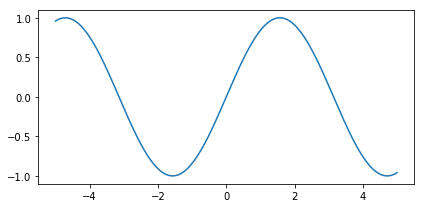

In [8]:
# create a sample of points to plot over 
w_vals = np.linspace(-5,5,200)

# evaluate the function over each of these values - one can use an explicit for-loop here instead of a list comprehension
g_vals = [g(v) for v in w_vals]

# plot
fig, ax = plt.subplots(1, 1, figsize=(6,3))
ax.plot(w_vals,g_vals)
plt.show()

Using autograd we can then compute the gradient function here.  We show the proper import statement and manner of using this calculator below.Mm

In [9]:
# import statment for gradient calculator
from autograd import grad    

In [10]:
# create the gradient function of g --> nabla_g
nabla_g = grad(g)

The gradient function can be evaluated like the original - as shown in the next cell.

In [11]:
# evaluate the gradient function at a point
w_val = 1.0
nabla_g(1.0)

0.54030230586813977

Now we can plot the gradient along with the original function, which we do in the next cell.

/home/saugat/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


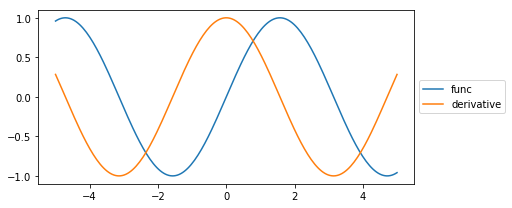

In [12]:
# create space over which to evaluate function and gradient
w_vals = np.linspace(-5,5,200)

# evaluate gradient over input range
g_vals = [g(v) for v in w_vals]
grad_vals = [nabla_g(v) for v in w_vals]

# create figure
fig, ax = plt.subplots(1, 1, figsize=(6,3))

# plot function and gradient values
ax.plot(w_vals,g_vals)
ax.plot(w_vals,grad_vals)
ax.legend(['func','derivative'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

---

#### <span style="color:#a50e3e;">Exercise 1. </span>   Study Newton's method notes and make a standard modification to the code

The following Newton's method code was copied from the [coures notes Section 1.3](https://jermwatt.github.io/mlrefined/blog_posts/Mathematical_Optimization/Part_5_Newtons_method.html), make sure you review these notes prior to completing the homework.

We will be using this for the remainder of the experiments.  Adjust the Newton's method code below to return not the best set of weights, but the entire weight history.

In [222]:
# import autograd functionality
from autograd import grad
from autograd import hessian

# run newton's method - input: function ('g'), initial point ('w'), maximum number of iterations ('max_its')
def newtons_method(g,w_init,max_its,epsilon):
    # check that initial point is float (for autograd)
    if np.size(w_init) == 1:
        w = np.asarray(float(w_init))
    else:
        w = np.asarray([float(s) for s in w_init])
        w.shape = np.shape(w_init)
        
    # Compute gradient and Hessian functions for input function
    g_grad = grad(g)              # gradient of input function
    g_hess = hessian(g)           # hessian of input function
    
    # Newton's loop
    weight_history = [w]           
    for k in range(max_its):
        # evluate current point with gradient and hessian
        grad_eval = g_grad(w)
        hess_eval = g_hess(w)

        # solve linear system for weights: setup system Aw = b, make sure A is correct shape (for use of np.linalg)
        A = hess_eval
        A.shape = (int((np.size(A))**(0.5)),int((np.size(A))**(0.5)))
        
        # add epsilon weighted diagonal to avoid any problems at flat regions
        A += epsilon*np.eye(np.size(w))
        
        # form b - our system: Aw = b
        b = np.dot(A,w) - grad_eval
        
        # solve for w
        w = np.linalg.solve(A,b)

        # record weight in history
        weight_history.append(w)
    return np.asarray(weight_history)

#### <span style="color:#a50e3e;">Exercise 2. </span>   Newton's method for linear regression

In our discussion of Newton's method we discussed how a single Newton step can solve the linear regression problem (you remember why?).  Here we will put that assertion to the test using a real dataset containing U.S. student debt data.  Here the input is in increments of time, and the output is the corresponding total amount of student debt held in the United States.

/home/saugat/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


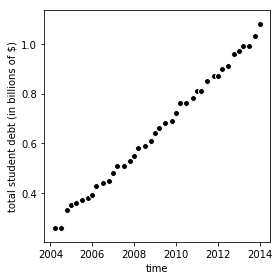

In [223]:
# import plotting library
import matplotlib.pyplot as plt

# load in dataset
data = np.loadtxt('student_debt.csv',delimiter = ',')

# form the input/output data vectors
x = data[:,:-1]
y = data[:,-1:]

# plot the data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x,y,color = 'k',edgecolor = 'w')
ax.set_xlabel('time')
ax.set_ylabel('total student debt (in billions of $)')
plt.show()

Your job: use Newton's method and fit a line by tuning its parameters using a single Newton step.  A compact (written using ``Numpy``) least squares cost function is provided for you in the next cell.

In [224]:
# a compact Least Squares cost function for linear regression
least_squares = lambda w: np.sum((w[0] + w[1]*x - y)**2)

Below is little code block for scattering the data and fitting a line with weights $w_0$ and $w_1$.  You can use this to visualize the fit learned by Newton's method.

/home/saugat/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


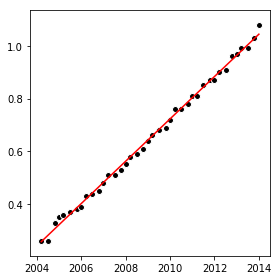

In [225]:
# our initial weights
w_init = 0.1*np.random.randn(2,1)
weights_history = newtons_method(least_squares, w_init, 1, 1e-7)
w = weights_history[-1]
# scatter plot the input data
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')

# fit a trend line
x_vals = np.linspace(min(x),max(x),200)
y_vals = w[0] + w[1]*x_vals
ax.plot(x_vals,y_vals,color = 'r')
plt.show()

#### <span style="color:#a50e3e;">Exercise 3. </span>   Perform two-class linear classification on a toy dataset

Now we will use Newton's method to perform 2-class classification via logistic regression (i.e., using the softmax cost).  The notes we used for class on this subject [can be found here](https://jermwatt.github.io/mlrefined/blog_posts/Linear_Supervised_Learning/Part_2_logistic_regression.html).  A compact softmax cost function - employing ``Numpy`` - is provided below.

In [226]:
# a pithy softmax cost implementation
softmax = lambda w: np.sum(np.log(1 + np.exp((-y)*(w[0] + np.dot(x,w[1:])))))

Use Newton's method to tune the softmax cost function to classify healthy from cancerous tissue using the dataset located in `breast_cancer_data.csv`.  You can examine the description of this dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

There are $N = 8$ input dimensions to the input of this dataset (these are the first $N = 8$ columns of the breast_cancer_data.csv, the last column are the associated labels).  Fit using Newton's method using a maximum of 10 iterations.  You should be able to reach a point on the surface where you misclassify less than 30 examples (that is, your model at worst incorrectly identifies 30 examples).  You can use the plotting function ``plot_history`` to visualize the cost function and misclassification rate history of your run of Newton's method.

All you need to do is run your adjusted Newton's method code on this dataset, get the corresponding weight history, and the ``plot_history`` function will do the rest (i.e., compute the misclassification rate and cost function value at each weight in your history).

In [227]:
# load in dataset
data = np.loadtxt('breast_cancer_data.csv',delimiter = ',')

# form the input/output data vectors
x = data[:,:-1]
y = data[:,-1:]

In [228]:
# import plotting library and other necessities
import matplotlib.pyplot as plt
from matplotlib import gridspec
import copy

# our plotting function
def plot_history(x,y,weight_history):
    '''
    A module for computing / plotting the cost and misclassification histories for a given run of gradient descent.
    Here the input should be the data and weight history from a gradient descent run
    '''
    
    # local copies of the softmax cost function written more compactly, for scoping issues
    softmax = lambda w: np.sum(np.log(1 + np.exp((-y)*(w[0] + np.dot(x,w[1:])))))
    count = lambda w: 0.25*sum((np.sign(w[0] + np.dot(x,w[1:])) - y)**2)
    
    # initialize figure
    fig = plt.figure(figsize = (9,3))

    # create subplot with 3 panels, plot input function in center plot
    gs = gridspec.GridSpec(1, 2) 
    ax1 = plt.subplot(gs[0]); 
    ax2 = plt.subplot(gs[1]);
    
    # loop over input weight history and create associated cost and misclassification histories
    cost_history = []
    count_history = []
    for weight in weight_history:
        cost_val = softmax(weight)
        cost_history.append(cost_val)
        
        count_val = count(weight)
        count_history.append(count_val)
        
    # now plot each, one per panel
    ax1.plot(cost_history)  
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('cost function val')
    ax1.set_title('cost function history')
    
    ax2.plot(count_history)
    ax2.set_xlabel('iteration')
    ax2.set_ylabel('misclassifications')
    ax2.set_title('number of misclassificaions')
    
    plt.show()
    
    # find the best misclassification rate in this run of gradient descent and print explicitly
    ind_best = np.argmin(count_history)
    weight_best = weight_history[ind_best]
    count_best = int(count_history[ind_best][0])
    print ('the lowest number of misclassifications we achieved from this run was = ' + str(count_best) + ' at step ' + str(ind_best))
    
    return weight_best

/home/saugat/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


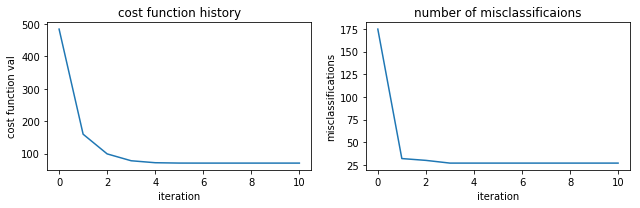

the lowest number of misclassifications we achieved from this run was = 27 at step 3


array([[ 7.00823701],
       [-0.40963702],
       [-0.06192713],
       [-0.37155399],
       [-0.21379551],
       [-0.10737125],
       [-0.38880796],
       [-0.1114369 ],
       [-0.15994451]])

In [654]:
# our initial weights
w_init = np.zeros((9,1))
weights_history = newtons_method(softmax, w_init, 10, 1e-7)
plot_history(x,y,weights_history)

#### <span style="color:#a50e3e;">Exercise 4. </span>   Newton's method and non-convex functions

Use Newton's method to minimize 

\begin{equation}
g(w) = \text{cos}(w)
\end{equation}

beginning at $w = 0.1$.   In particular make sure you achieve decrease at *every* step of Newton's method.

/home/saugat/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


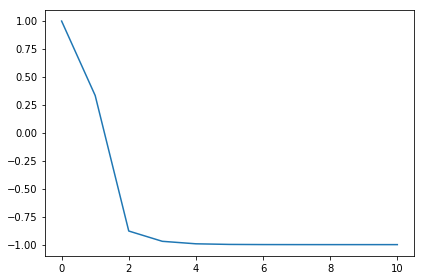

In [648]:
w_init = 0.1
weights_history = newtons_method(np.cos, w_init, 10, 1)
plt.plot(np.cos(weights_history))
plt.show()

#### <span style="color:#a50e3e;">Exercise 5. </span>   Newton's method and square roots

Use Newton's method to compute a square root of the number: 999.  Briefly explain how you set up the relevant cost function that then minimize to obtain this square root.

/home/saugat/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


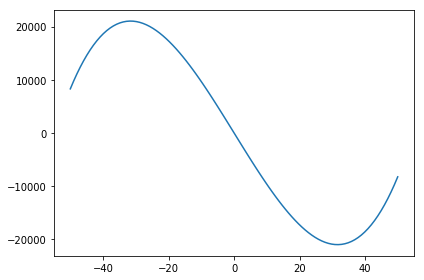

In [637]:
g = lambda w: w**3 / 3 - 999*w
w_test = np.linspace(-50,50, 100)
plt.plot(w_test, g(w_test))
plt.show()

In [665]:
w_init = np.random.randint(-1000,1000,50)
w_final = []
for w in w_init:
    w_hist = newtons_method(g, w, 100, 1e-7)
    w_final.append(w_hist[-1])

/home/saugat/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


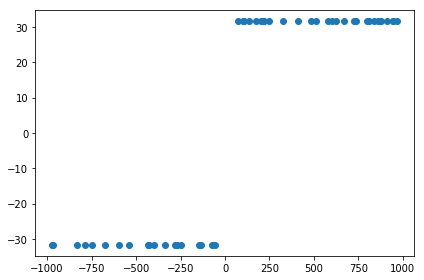

In [664]:
plt.scatter(w_init, w_final)
plt.show()

In [666]:
print(np.unique(w_final))

[-31.60696126 -31.60696126  31.60696126  31.60696126]
